### Using Denoising Autoencoders to Detect Fraudulent Transactions

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.layers import Input, Dense
from keras import regularizers

SetSeed = 1

In [4]:
path = 'Python-Machine-Learning-Cookbook-Second-Edition-master/Chapter14/'

CreditCardData = pd.read_csv(path + "creditcard.csv")

CountClasses = pd.value_counts(CreditCardData['Class'], sort = True)

print(CountClasses)
print(CreditCardData.Amount.describe())

0    284315
1       492
Name: Class, dtype: int64
count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64


In [16]:
from sklearn.preprocessing import StandardScaler

Data = CreditCardData.drop(['Time'], axis=1)
Data['Amount'] = StandardScaler().fit_transform(Data['Amount'].values.reshape(-1, 1))

Data.Amount.describe()

count    2.848070e+05
mean     3.202236e-16
std      1.000002e+00
min     -3.532294e-01
25%     -3.308401e-01
50%     -2.652715e-01
75%     -4.471707e-02
max      1.023622e+02
Name: Amount, dtype: float64

In [17]:
XTrain, XTest = train_test_split(Data, test_size=0.3, random_state=SetSeed)
XTrain = XTrain[XTrain.Class == 0]
XTrain = XTrain.drop(['Class'], axis=1)

YTest = XTest['Class']
XTest = XTest.drop(['Class'], axis=1)

XTrain = XTrain.values
XTest = XTest.values

In [19]:
InputDim = XTrain.shape[1]

InputModel = Input(shape=(InputDim,))
EncodedLayer = Dense(16, activation='relu')(InputModel)
DecodedLayer = Dense(InputDim, activation='sigmoid')(EncodedLayer)
AutoencoderModel = Model(InputModel, DecodedLayer)
AutoencoderModel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 29)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                480       
_________________________________________________________________
dense_2 (Dense)              (None, 29)                493       
Total params: 973
Trainable params: 973
Non-trainable params: 0
_________________________________________________________________


In [22]:
NumEpoch = 10
BatchSize = 32

AutoencoderModel.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['accuracy'])

history = AutoencoderModel.fit(XTrain, XTrain,
                    epochs=NumEpoch,
                    batch_size=BatchSize,
                    shuffle=True,
                    validation_data=(XTest, XTest),
                    verbose=1,
                    ).history

Train on 199007 samples, validate on 85443 samples
Epoch 1/10
199007/199007 [==============================] - 8s 39us/step - loss: 0.8043 - acc: 0.6595 - val_loss: 0.7871 - val_acc: 0.7508
Epoch 2/10
199007/199007 [==============================] - 8s 39us/step - loss: 0.7470 - acc: 0.7668 - val_loss: 0.7788 - val_acc: 0.7763
Epoch 3/10
199007/199007 [==============================] - 7s 37us/step - loss: 0.7420 - acc: 0.7868 - val_loss: 0.7752 - val_acc: 0.8019
Epoch 4/10
199007/199007 [==============================] - 7s 38us/step - loss: 0.7399 - acc: 0.8090 - val_loss: 0.7738 - val_acc: 0.8128
Epoch 5/10
199007/199007 [==============================] - 8s 38us/step - loss: 0.7386 - acc: 0.8154 - val_loss: 0.7723 - val_acc: 0.8144
Epoch 6/10
199007/199007 [==============================] - 8s 39us/step - loss: 0.7376 - acc: 0.8158 - val_loss: 0.7715 - val_acc: 0.8174
Epoch 7/10
199007/199007 [==============================] - 8s 38us/step - loss: 0.7369 - acc: 0.8178 - val_loss: 0

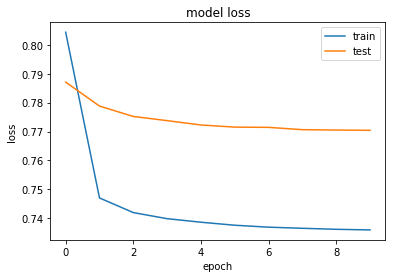

In [23]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [24]:
PredData = AutoencoderModel.predict(XTest)
mse = np.mean(np.power(XTest - PredData, 2), axis=1)
ErrorCreditCardData = pd.DataFrame({'Error': mse,
                        'TrueClass': YTest})

ErrorCreditCardData.describe()

,Error,TrueClass
count,85443.000000,85443.000000
mean,0.770419,0.001580
std,4.066587,0.039718
min,0.026063,0.000000
25%,0.213112,0.000000
50%,0.369677,0.000000
75%,0.618375,0.000000
max,528.289226,1.000000


In [25]:
from sklearn.metrics import confusion_matrix

threshold = 3.
YPred = [1 if e > threshold else 0 for e in ErrorCreditCardData.Error.values]
ConfMatrix = confusion_matrix(ErrorCreditCardData.TrueClass, YPred)
print(ConfMatrix)

[[83129  2179]
 [   28   107]]


In [26]:
from sklearn.metrics import accuracy_score

print(accuracy_score(ErrorCreditCardData.TrueClass, YPred))

0.9741699144458879


### Generating Word Embeddings Using CBOW and Skipgram Representations

In [27]:
import gensim

In [28]:
# define training data
sentences = [['my', 'first', 'book', 'with', 'Packt', 'is', 'on','Matlab'],
            ['my', 'second', 'book', 'with', 'Packt', 'is', 'on','R'],
            ['my', 'third', 'book', 'with', 'Packt', 'is', 'on','Python'],
            ['one', 'more', 'book'],
            ['is', 'on', 'Python', 'too']]

In [29]:
# train model
Model1 = gensim.models.Word2Vec(sentences, min_count=1, sg=0)
# summarize the loaded model
print(Model1)

Word2Vec(vocab=15, size=100, alpha=0.025)


In [30]:
# summarize vocabulary
wordsM1 = list(Model1.wv.vocab)
print(wordsM1)

['my', 'first', 'book', 'with', 'Packt', 'is', 'on', 'Matlab', 'second', 'R', 'third', 'Python', 'one', 'more', 'too']


In [31]:
# access vector for one word
print(Model1.wv['book'])

[ 3.4138307e-03 -2.6505070e-03 -1.2297690e-03  4.0474725e-03
 -2.3211353e-03 -2.2359448e-03  2.0887628e-03 -2.0425036e-03
 -1.0579473e-03 -3.3580463e-03 -3.1412751e-04 -2.2954863e-04
 -4.2218333e-03  2.2308712e-03  3.8038280e-03 -3.4561926e-03
  3.6405381e-03  2.1970016e-03  2.4503667e-04  4.5241634e-03
  1.1792044e-03 -1.6563816e-03  3.1506300e-03 -2.8022858e-03
  3.9613782e-03 -1.7495720e-03 -3.8231234e-03  2.2994706e-03
  2.2258472e-03  2.7213914e-03 -1.0069918e-03  4.2700153e-03
 -4.1328305e-03 -2.5509286e-03  2.4521383e-03 -3.3885285e-03
 -1.8550181e-03 -2.7930486e-04  9.4289612e-04 -1.8151860e-03
 -4.3439964e-04 -2.4442915e-03 -4.5801923e-03  4.4920035e-03
  4.7685322e-03  8.5561140e-04 -1.5972847e-03  4.5516214e-04
  2.9179035e-03  1.0212953e-05 -4.5364811e-03 -1.7151521e-03
 -4.9482835e-03 -4.6076942e-03 -7.5488316e-04  1.5365989e-03
 -2.9720231e-03  3.1497739e-03 -4.1488782e-03 -1.5447988e-03
 -3.5768955e-03  8.5683388e-04  1.6861324e-03  2.5572490e-03
  1.9652268e-03  4.97712

In [32]:
# train model
Model2 = gensim.models.Word2Vec(sentences, min_count=1, sg=1)
# summarize the loaded model
print(Model2)

Word2Vec(vocab=15, size=100, alpha=0.025)


In [33]:
# summarize vocabulary
wordsM2 = list(Model1.wv.vocab)
print(wordsM2)

['my', 'first', 'book', 'with', 'Packt', 'is', 'on', 'Matlab', 'second', 'R', 'third', 'Python', 'one', 'more', 'too']


In [34]:
# access vector for one word
print(Model2.wv['book'])

[ 3.4138307e-03 -2.6505070e-03 -1.2297690e-03  4.0474725e-03
 -2.3211353e-03 -2.2359448e-03  2.0887628e-03 -2.0425036e-03
 -1.0579473e-03 -3.3580463e-03 -3.1412751e-04 -2.2954863e-04
 -4.2218333e-03  2.2308712e-03  3.8038280e-03 -3.4561926e-03
  3.6405381e-03  2.1970016e-03  2.4503667e-04  4.5241634e-03
  1.1792044e-03 -1.6563816e-03  3.1506300e-03 -2.8022858e-03
  3.9613782e-03 -1.7495720e-03 -3.8231234e-03  2.2994706e-03
  2.2258472e-03  2.7213914e-03 -1.0069918e-03  4.2700153e-03
 -4.1328305e-03 -2.5509286e-03  2.4521383e-03 -3.3885285e-03
 -1.8550181e-03 -2.7930486e-04  9.4289612e-04 -1.8151860e-03
 -4.3439964e-04 -2.4442915e-03 -4.5801923e-03  4.4920035e-03
  4.7685322e-03  8.5561140e-04 -1.5972847e-03  4.5516214e-04
  2.9179035e-03  1.0212953e-05 -4.5364811e-03 -1.7151521e-03
 -4.9482835e-03 -4.6076942e-03 -7.5488316e-04  1.5365989e-03
 -2.9720231e-03  3.1497739e-03 -4.1488782e-03 -1.5447988e-03
 -3.5768955e-03  8.5683388e-04  1.6861324e-03  2.5572490e-03
  1.9652268e-03  4.97712

### Visualizing the MNIST Dataset Using PCA and t-SNE

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from keras.datasets import mnist

In [37]:
(XTrain, YTrain), (XTest, YTest) = mnist.load_data()

XTrain = XTrain.reshape((len(XTrain), np.prod(XTrain.shape[1:])))
XTest = XTest.reshape((len(XTest), np.prod(XTest.shape[1:])))

In [38]:
from sklearn.utils import shuffle
XTrain, YTrain = shuffle(XTrain, YTrain)
XTrain, YTrain = XTrain[:1000], YTrain[:1000] 

In [43]:
pca = PCA(n_components=2)
XPCATransformed = pca.fit_transform(XTrain)

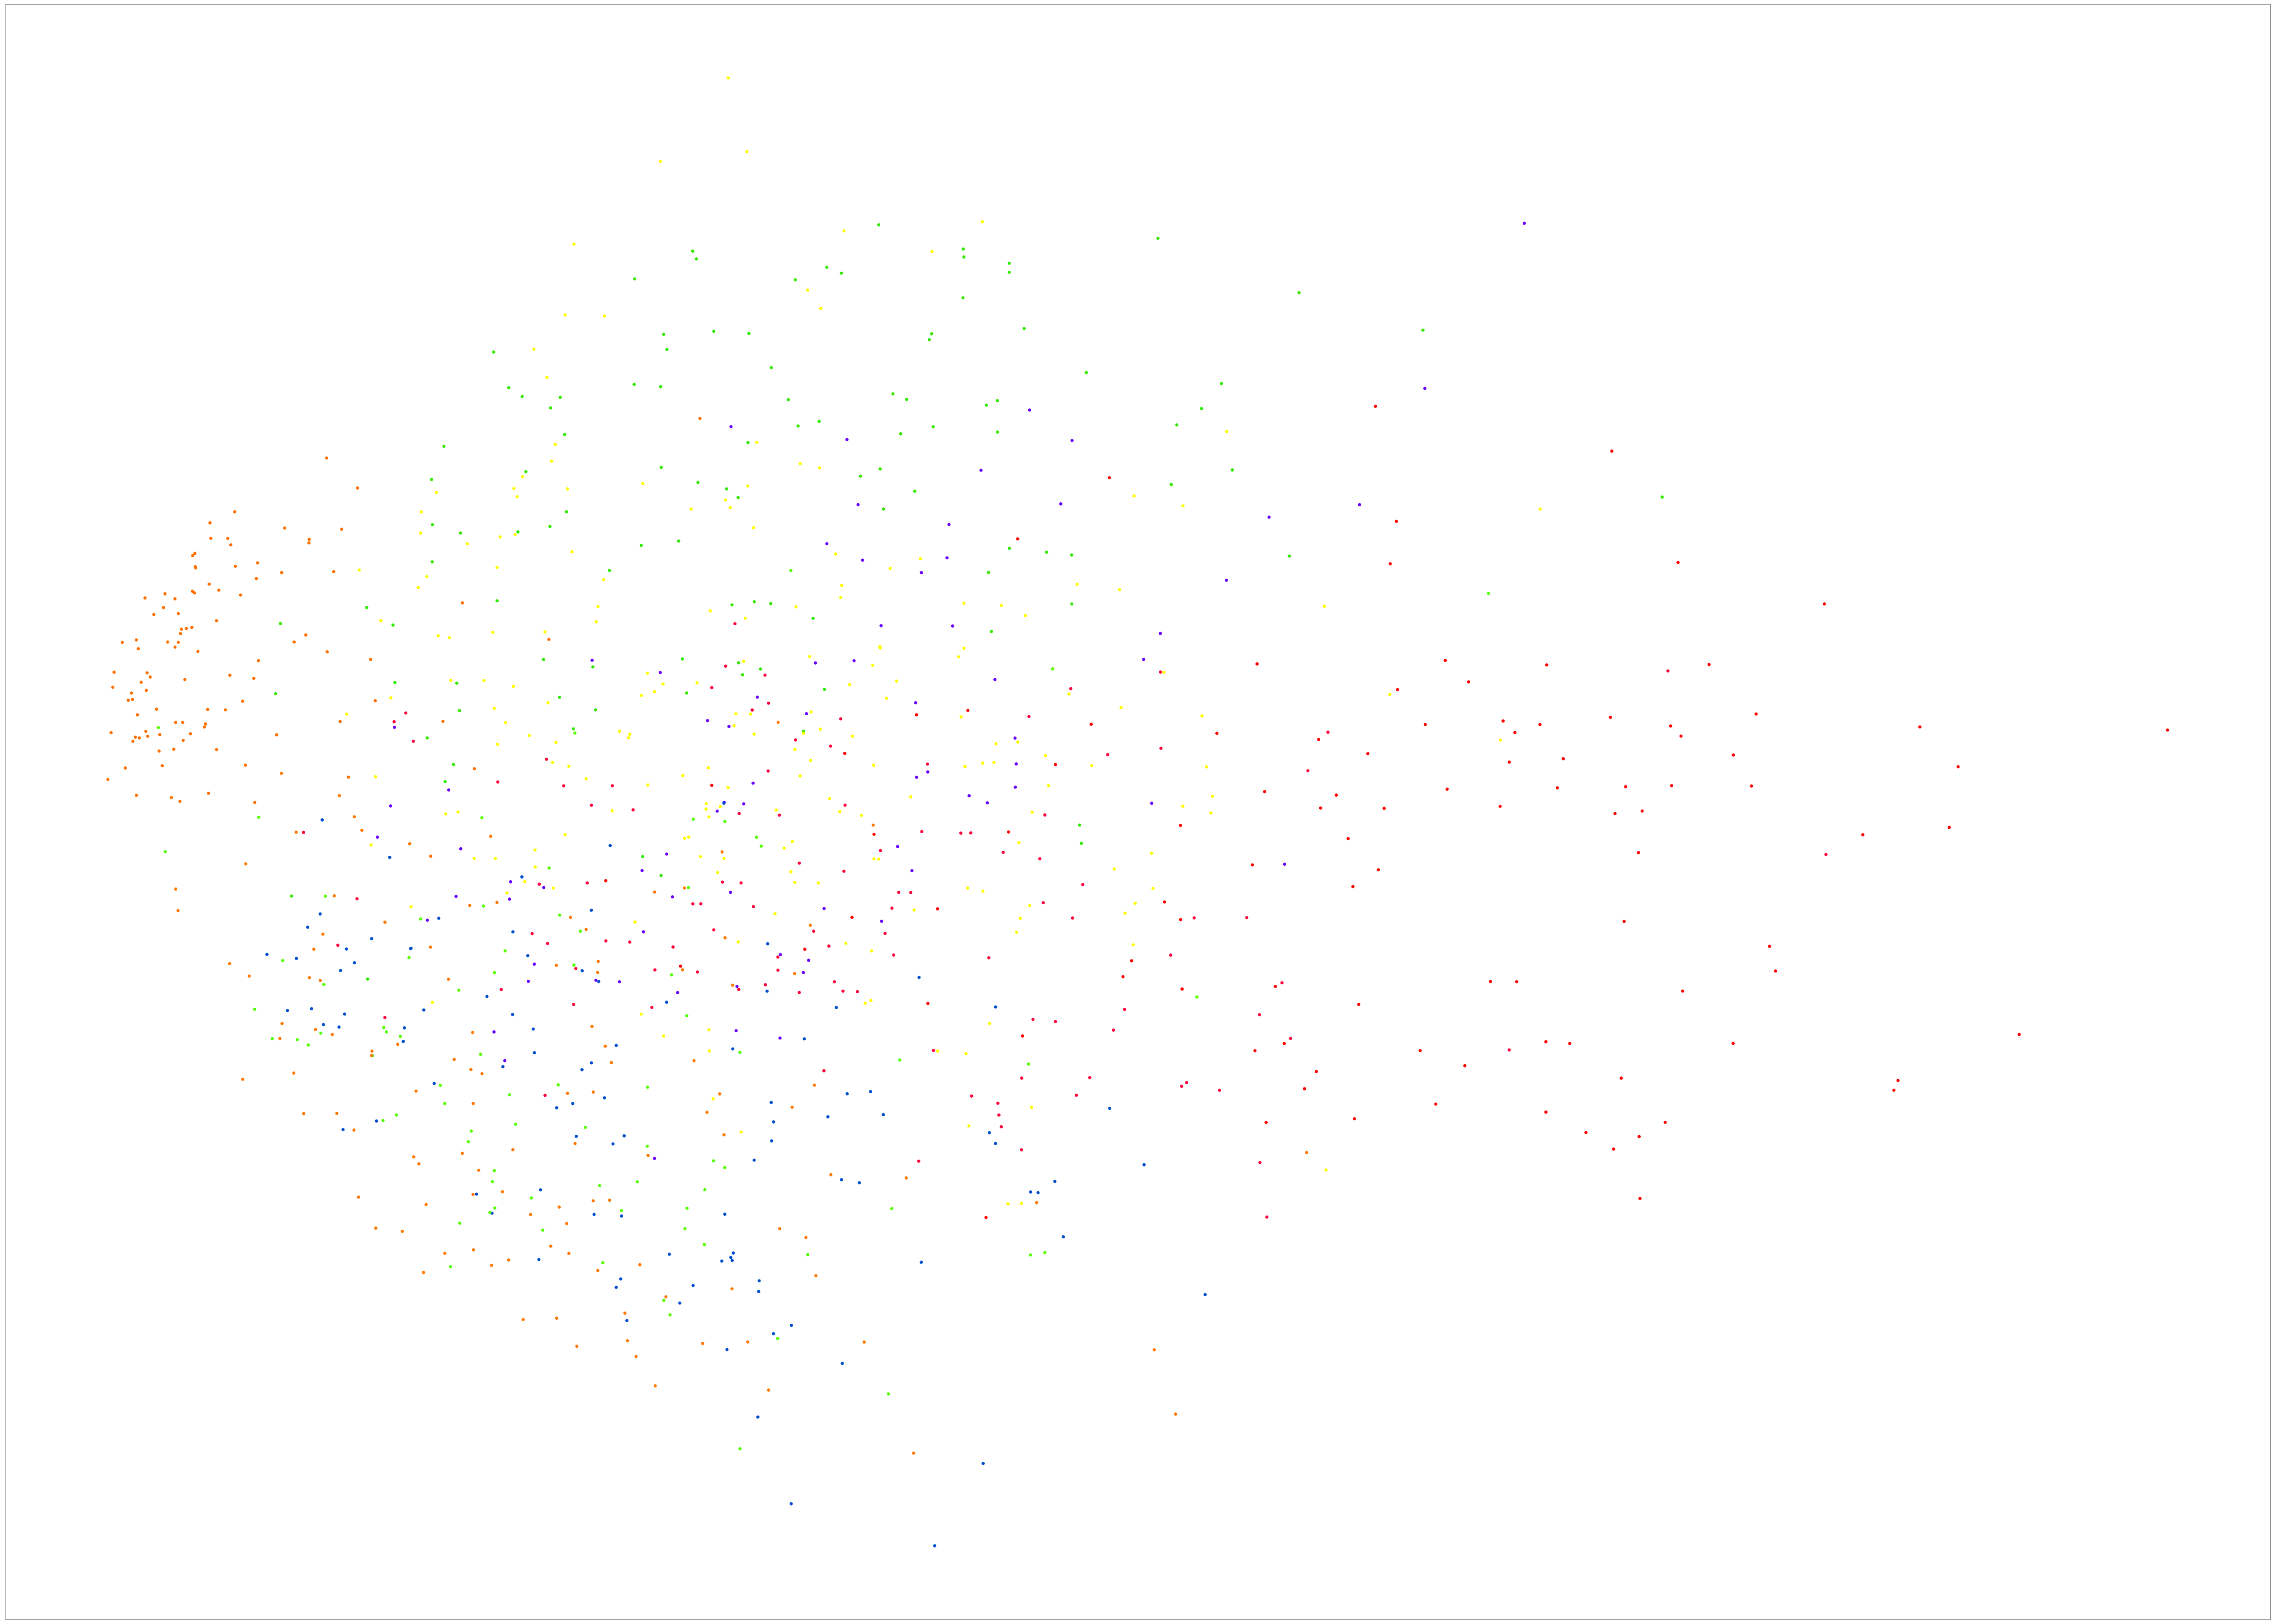

In [44]:
fig, plot = plt.subplots()
fig.set_size_inches(70, 50)
plt.prism()
plot.scatter(XPCATransformed[:, 0], XPCATransformed[:, 1], c=YTrain)
plot.set_xticks(())
plot.set_yticks(())
plt.tight_layout()
plt.show()

In [41]:
from sklearn.manifold import TSNE
TSNEModel = TSNE(n_components=2)
XTSNETransformed = TSNEModel.fit_transform(XTrain)

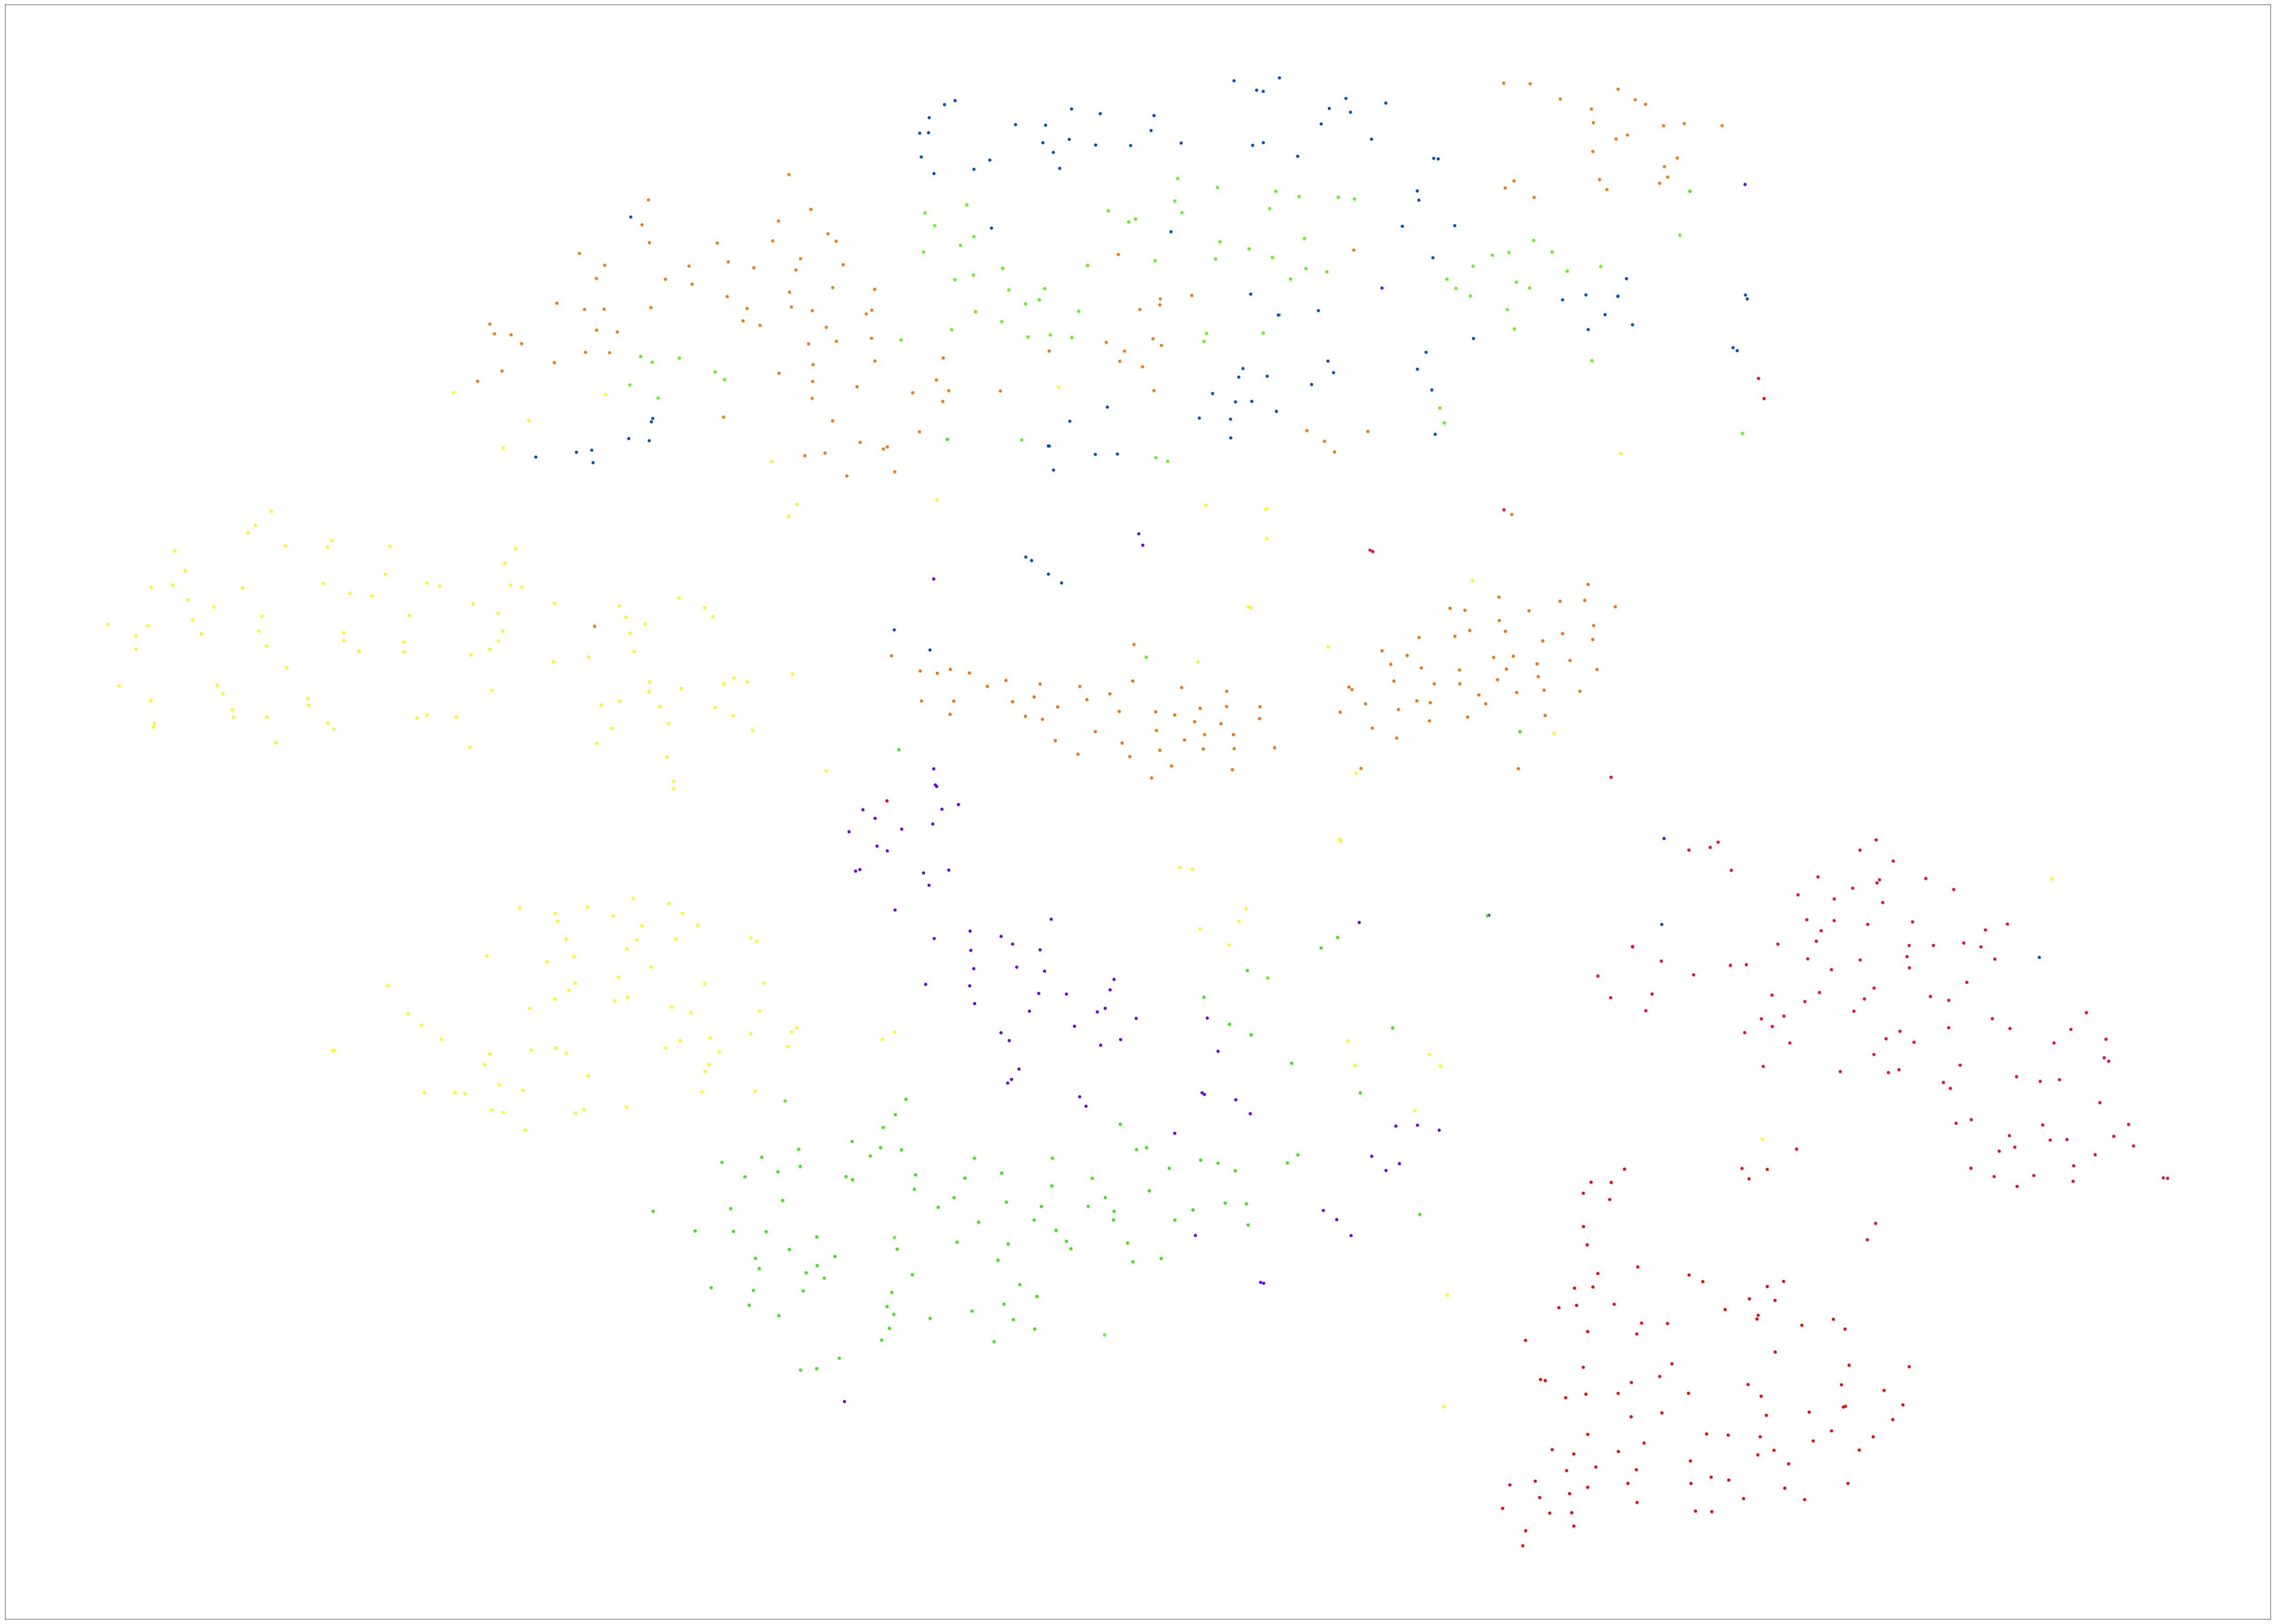

In [42]:
fig, plot = plt.subplots()
fig.set_size_inches(70, 50)
plt.prism()
plot.scatter(XTSNETransformed[:, 0], XTSNETransformed[:, 1], c=YTrain)
plot.set_xticks(())
plot.set_yticks(())
plt.tight_layout()
plt.show()

### Using Word Embedding for Twitter Sentiment Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from keras import models
from keras import layers

In [5]:
TweetData = pd.read_csv(path + 'Tweets.csv')
TweetData = TweetData.reindex(np.random.permutation(TweetData.index))
TweetData = TweetData[['text', 'airline_sentiment']]
XTrain, XTest, YTrain, YTest = train_test_split(TweetData.text, TweetData.airline_sentiment,
                                                test_size=0.1, random_state=11)

In [6]:
TkData = Tokenizer(num_words=1000,
                 filters='!"#$%&()*+,-./:;<=>?@[\]^_`{"}~\t\n',lower=True, split=" ")

TkData.fit_on_texts(XTrain)
XTrainSeq = TkData.texts_to_sequences(XTrain)
XTestSeq = TkData.texts_to_sequences(XTest)

XTrainSeqTrunc = pad_sequences(XTrainSeq, maxlen=24)
XTestSeqTrunc = pad_sequences(XTestSeq, maxlen=24)

In [15]:
LabelEnc = LabelEncoder()
YTrainLabelEnc = LabelEnc.fit_transform(YTrain)
YTestLabelEnc = LabelEnc.transform(YTest)
YTrainLabelEncCat = to_categorical(YTrainLabelEnc)
YTestLabelEncCat = to_categorical(YTestLabelEnc)

In [66]:
XTrainEmb, XValEmb, YTrainEmb, YValEmb = train_test_split(XTrainSeqTrunc, YTrainLabelEncCat, 
                                                          test_size=0.2, random_state=11)

In [72]:
EmbModel = models.Sequential()
EmbModel.add(layers.Embedding(1000, 8, input_length=24))
EmbModel.add(layers.Flatten())
EmbModel.add(layers.Dense(3, activation='softmax'))
EmbModel.summary()

EmbModel.compile(optimizer='rmsprop'
                  , loss='categorical_crossentropy'
                  , metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 24, 8)             8000      
_________________________________________________________________
flatten_3 (Flatten)          (None, 192)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 579       
Total params: 8,579
Trainable params: 8,579
Non-trainable params: 0
_________________________________________________________________


In [68]:
EmbHistory = EmbModel.fit(XTrainEmb
                       , YTrainEmb
                       , epochs=100
                       , batch_size=512
                       , validation_data=(XValEmb, YValEmb)
                       , verbose=1)

Train on 10540 samples, validate on 2636 samples
Epoch 1/100
10540/10540 [==============================] - 0s 26us/step - loss: 1.0635 - acc: 0.5437 - val_loss: 1.0134 - val_acc: 0.6320
Epoch 2/100
10540/10540 [==============================] - 0s 6us/step - loss: 0.9667 - acc: 0.6267 - val_loss: 0.9179 - val_acc: 0.6320
Epoch 3/100
10540/10540 [==============================] - 0s 6us/step - loss: 0.8808 - acc: 0.6268 - val_loss: 0.8425 - val_acc: 0.6324
Epoch 4/100
10540/10540 [==============================] - 0s 6us/step - loss: 0.8164 - acc: 0.6390 - val_loss: 0.7918 - val_acc: 0.6597
Epoch 5/100
10540/10540 [==============================] - 0s 6us/step - loss: 0.7746 - acc: 0.6596 - val_loss: 0.7610 - val_acc: 0.6741
Epoch 6/100
10540/10540 [==============================] - 0s 7us/step - loss: 0.7450 - acc: 0.6726 - val_loss: 0.7370 - val_acc: 0.6817
Epoch 7/100
10540/10540 [==============================] - 0s 7us/step - loss: 0.7185 - acc: 0.6844 - val_loss: 0.7145 - val_acc

10540/10540 [==============================] - 0s 6us/step - loss: 0.2972 - acc: 0.8935 - val_loss: 0.5511 - val_acc: 0.7898
Epoch 61/100
10540/10540 [==============================] - 0s 6us/step - loss: 0.2938 - acc: 0.8954 - val_loss: 0.5537 - val_acc: 0.7887
Epoch 62/100
10540/10540 [==============================] - 0s 6us/step - loss: 0.2905 - acc: 0.8975 - val_loss: 0.5555 - val_acc: 0.7879
Epoch 63/100
10540/10540 [==============================] - 0s 7us/step - loss: 0.2873 - acc: 0.8986 - val_loss: 0.5586 - val_acc: 0.7876
Epoch 64/100
10540/10540 [==============================] - 0s 5us/step - loss: 0.2842 - acc: 0.9007 - val_loss: 0.5616 - val_acc: 0.7876
Epoch 65/100
10540/10540 [==============================] - 0s 7us/step - loss: 0.2808 - acc: 0.9015 - val_loss: 0.5632 - val_acc: 0.7857
Epoch 66/100
10540/10540 [==============================] - 0s 6us/step - loss: 0.2781 - acc: 0.9019 - val_loss: 0.5658 - val_acc: 0.7857
Epoch 67/100
10540/10540 [=====================

In [69]:
print('Train Accuracy: ', EmbHistory.history['acc'][-1])
print('Validation Accuracy: ', EmbHistory.history['val_acc'][-1])

Train Accuracy:  0.9416508536411191
Validation Accuracy:  0.7708649467083318


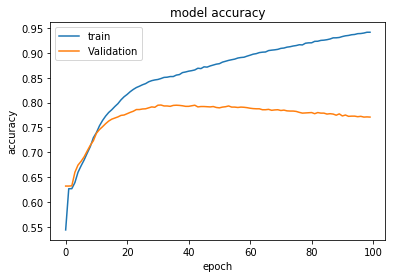

In [70]:
plt.plot(EmbHistory.history['acc'])
plt.plot(EmbHistory.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')
plt.show()

### Implementing LDA with Scikit-Learn

In [73]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.datasets import make_multilabel_classification

In [74]:
X, Y = make_multilabel_classification(n_samples=100, n_features=20, n_classes=5, n_labels=2, random_state=1)
LDAModel = LatentDirichletAllocation(n_components=5, random_state=1)
LDAModel.fit(X) 
# get topics for some given samples:
print(LDAModel.transform(X[-10:]))

[[0.41670443 0.25866531 0.00448249 0.00449228 0.31565548]
 [0.00476734 0.00477983 0.54350595 0.44215594 0.00479095]
 [0.00467905 0.00469265 0.00467741 0.60943777 0.37651312]
 [0.00367859 0.00367218 0.23385462 0.00370326 0.75509135]
 [0.0039368  0.5307067  0.00394601 0.45747303 0.00393746]
 [0.7036109  0.28329774 0.00436774 0.00434138 0.00438224]
 [0.00374552 0.00374514 0.25885877 0.36022806 0.37342251]
 [0.00363353 0.0036177  0.65343496 0.00360255 0.33571126]
 [0.00475683 0.00476536 0.00478948 0.5558687  0.42981963]
 [0.00346725 0.86871399 0.00348196 0.12085227 0.00348452]]


### Using LDA to Classify Text Documents

In [82]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.datasets import fetch_20newsgroups

In [83]:
NGData = fetch_20newsgroups(shuffle=True, random_state=7,
                             remove=('headers', 'footers', 'quotes'))

print(list(NGData.target_names))

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [84]:
NGData = NGData.data[:2000]

NGDataVect = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=1000,
                                stop_words='english')

NGDataVectModel = NGDataVect.fit_transform(NGData)

In [85]:
LDAModel = LatentDirichletAllocation(n_components=10, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)

LDAModel.fit(NGDataVectModel)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=50.0,
                          max_doc_update_iter=100, max_iter=5,
                          mean_change_tol=0.001, n_components=10, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [86]:
NGDataVectModelFeatureNames = NGDataVect.get_feature_names()

for topic_idx, topic in enumerate(LDAModel.components_):
    message = "Topic %d: " % topic_idx
    message += " ".join([NGDataVectModelFeatureNames[i]
    for i in topic.argsort()[:-20 - 1:-1]])
    print(message)

Topic 0: ax max b8f pl g9v 1d9 a86 34u 145 3t 0t 2tm wm 1t giz bhj 7ey sl bxn gk
Topic 1: key encryption chip keys des clipper security bit algorithm public law use used ripem number data escrow product enforcement cipher
Topic 2: people don just think god like does know say believe time good make way did said really right ve things
Topic 3: price 00 car sale new 50 excellent edu 20 condition shipping offer best asking old tape interested hard used send
Topic 4: cancer medical air hiv health research aids gun 800 care number center 10 volume patients insurance page dr disease april
Topic 5: file use like edu program output windows thanks know available mail ftp does files need info don email help good
Topic 6: 55 10 18 11 17 40 14 12 24 15 16 period 34 pp 25 13 19 28 widget 20
Topic 7: new space people information university like time 1993 years available service know work public use center internet program technology nasa
Topic 8: drive card master slave mode video drives screen probl

### Preparing Data For LDA

In [1]:
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models

In [2]:
Doc1 = "Some doctors say that pizza is good for your health."
Doc2 = "The pizza is good to eat, my sister likes to eat a good pizza, but not to my brother."
Doc3 = "Doctors suggest that walking can cause a decrease in blood pressure."
Doc4 = "My brother likes to walk, but my sister don't like to walk."
Doc5 = "When my sister is forced to walk for a long time she feels an increase in blood pressure."
Doc6 = "When my brother eats pizza, he has health problems."

DocList = [Doc1, Doc2, Doc3, Doc4, Doc5, Doc6]

In [3]:
Tokenizer = RegexpTokenizer(r'\w+')

EnStop = get_stop_words('en')

PStemmer = PorterStemmer()

Texts = []

In [4]:
for i in DocList:
    
    raw = i.lower()
    Tokens = Tokenizer.tokenize(raw)

    StoppedTokens = [i for i in Tokens if not i in EnStop]
    
    StemmedTokens = [PStemmer.stem(i) for i in StoppedTokens]
    
    Texts.append(StemmedTokens)

In [6]:
Dictionary = corpora.Dictionary(Texts)
    
CorpusMat = [Dictionary.doc2bow(text) for text in Texts]

LDAModel = models.ldamodel.LdaModel(CorpusMat, num_topics=3, id2word = Dictionary, passes=20)
print(LDAModel.print_topics(num_topics=3, num_words=3))

[(0, '0.152*"pizza" + 0.151*"eat" + 0.107*"brother"'), (1, '0.104*"doctor" + 0.103*"health" + 0.102*"say"'), (2, '0.132*"walk" + 0.071*"blood" + 0.071*"pressur"')]
